In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("data/output/monthly_pred_1920_v2.csv")
df["year"] = "2020"
df["month"] = df["site_month"].str.split("_").apply(lambda x: x[1])

In [3]:
df2 = pd.read_csv("data/output/monthly_pred_1920_2021_v2.csv")
df2["year"] = "2021"

df2["month"] = df2["site_month"].str.split("_").apply(lambda x: x[1])
df2["month"] = df2["month"].astype(int)

In [4]:
df = pd.concat([df,df2])

In [5]:
df["site"] = df["site_month"].str.split("_").apply(lambda x: x[0])

z_score = 1.96
df["ci_lower"] = df["fit"] - z_score * df["se.fit"]
df["ci_upper"] = df["fit"] + z_score * df["se.fit"]

df = df.melt(id_vars=["site", "year","month"], value_vars=["fit", "ci_lower", "ci_upper"])
df["variable"] = df["variable"].map({"fit": "fit", "ci_upper": "ci", "ci_lower": "ci"})

df = df.rename(columns={"value":"slant"})

In [6]:
df["date"] = pd.to_datetime(
    df["year"].astype(str) + df["month"].astype(str), format="%Y%m"
)

In [7]:
df["site"] = np.where(df["site"] == "24hu","24.hu",df["site"])
df["site"] = np.where(df["site"] == "index","Index",df["site"])

df = df.loc[
    lambda x: (x["date"] != df["date"].values[-1])
    & (x["date"] != df["date"].values[-2])
]

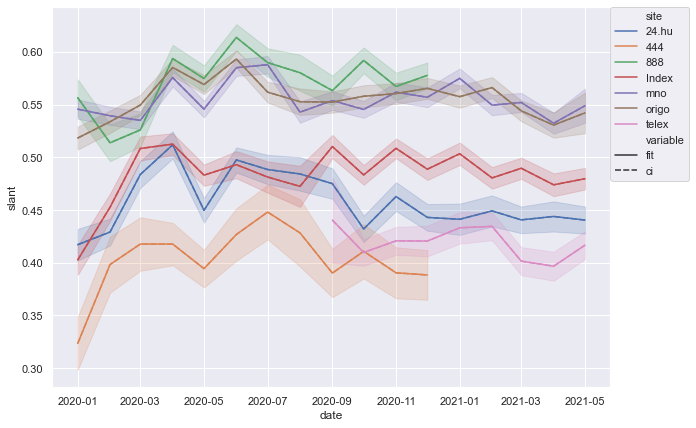

In [8]:
plt.figure(figsize=(10, 7))
sns.set_theme(style="darkgrid")
sns.lineplot(
    x="date",
    y="slant",
    hue="site",
    style="variable",
    data=df.loc[
        lambda x: (x["date"] != df["date"].values[-1])
        & (x["date"] != df["date"].values[-2])
    ],
)
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.0)
plt.savefig("figures/slant_bymonth_ci_1920_w2021.png")

In [114]:
df = pd.read_csv("data/output/monthly_pred_1920.csv")
df["month"] = df["site_month"].str.split("_").apply(lambda x: x[1])
df["site"] = df["site_month"].str.split("_").apply(lambda x: x[0])
df["fit"] = -1 * df["fit"] + 1
df = df.rename(columns={"fit":"slant"})
df["govt"] = df["site"].map({"24.hu":0,"origo":1,"mno":1,"888":1,"444":0,"Index":0})

In [130]:
rated = pd.read_csv(
    "/Users/vigadam/Dropbox/github/media_network/media_data/qualtrics-news-headlines/rated_df.csv",
    index_col=0,
)

In [131]:
rated.loc[
    lambda x: (x["type"] != "cross")
    & (x["type"] != "covid-kulfold")
    & (x["type"] != "covid-belfold")
]

,link,date,page,rating,title,type
0,https://index.hu/belfold/2020/07/01/utoljara_k...,2020-07-01,index,0.5,Utoljára karácsonykor beszélt egymással Tarlós...,index
1,https://index.hu/belfold/2020/07/01/utoljara_k...,2020-07-01,index,0.5,Utoljára karácsonykor beszélt egymással Tarlós...,index
2,https://index.hu/belfold/2020/07/01/utoljara_k...,2020-07-01,index,0.5,Utoljára karácsonykor beszélt egymással Tarlós...,index
3,https://index.hu/belfold/2020/01/21/hasszan_f_...,2020-01-21,index,0.0,"Hasszán F. a szakértő szerint beszámítható, be...",index
4,https://index.hu/belfold/2020/01/21/hasszan_f_...,2020-01-21,index,0.5,"Hasszán F. a szakértő szerint beszámítható, be...",index
...,...,...,...,...,...,...
10474,https://telex.hu/belfold/2020/10/20/rendorsegi...,2020-10-20,telex,1.0,"Kiadta a külügyminisztérium, idén hányszor és ...",telex
10475,https://telex.hu/belfold/2020/10/20/rendorsegi...,2020-10-20,telex,0.0,"Kiadta a külügyminisztérium, idén hányszor és ...",telex
10476,https://telex.hu/belfold/2020/11/02/magatehete...,2020-11-02,telex,0.5,Magatehetetlen férfit fosztottak ki az Örs vez...,telex
10477,https://telex.hu/belfold/2020/12/14/kiskore-pa...,2020-12-14,telex,0.0,"Kiskörén állítólag a közmunkások elloptak, maj...",telex


In [132]:
rated["month"] = rated["date"].apply(lambda x: x[5:7])

df["site"] = df["site"].str.lower().str.replace(".","")

In [133]:
df["site_month"] = df["site"] + "_" +  df["month"]

In [134]:
df

,site_month,slant,se.fit,month,site,govt
0,24hu_1,0.433078,0.007555,1,24hu,0.0
1,24hu_10,0.448487,0.006328,10,24hu,0.0
2,24hu_11,0.480222,0.006886,11,24hu,0.0
3,24hu_12,0.461476,0.006407,12,24hu,0.0
4,24hu_2,0.443986,0.006432,2,24hu,0.0
...,...,...,...,...,...,...
71,origo_9,0.569998,0.005038,9,origo,1.0
72,telex_10,0.427796,0.006355,10,telex,NaN
73,telex_11,0.440232,0.006648,11,telex,NaN
74,telex_12,0.438808,0.007332,12,telex,NaN


In [136]:
rated["site_month"] = rated["page"] + "_" +  rated["month"].astype(int).astype(str)

In [137]:
df[["site_month","slant"]]

,site_month,slant
0,24hu_1,0.433078
1,24hu_10,0.448487
2,24hu_11,0.480222
3,24hu_12,0.461476
4,24hu_2,0.443986
...,...,...
71,origo_9,0.569998
72,telex_10,0.427796
73,telex_11,0.440232
74,telex_12,0.438808


In [138]:
df["site_month"].unique()

array(['24hu_1', '24hu_10', '24hu_11', '24hu_12', '24hu_2', '24hu_3',
       '24hu_4', '24hu_5', '24hu_6', '24hu_7', '24hu_8', '24hu_9',
       '444_1', '444_10', '444_11', '444_12', '444_2', '444_3', '444_4',
       '444_5', '444_6', '444_7', '444_8', '444_9', '888_1', '888_10',
       '888_11', '888_12', '888_2', '888_3', '888_4', '888_5', '888_6',
       '888_7', '888_8', '888_9', 'index_1', 'index_10', 'index_11',
       'index_12', 'index_2', 'index_3', 'index_4', 'index_5', 'index_6',
       'index_7', 'index_8', 'index_9', 'mno_1', 'mno_10', 'mno_11',
       'mno_12', 'mno_2', 'mno_3', 'mno_4', 'mno_5', 'mno_6', 'mno_7',
       'mno_8', 'mno_9', 'origo_1', 'origo_10', 'origo_11', 'origo_12',
       'origo_2', 'origo_3', 'origo_4', 'origo_5', 'origo_6', 'origo_7',
       'origo_8', 'origo_9', 'telex_10', 'telex_11', 'telex_12',
       'telex_9'], dtype=object)

In [139]:
rated["site_month"].unique()

array(['index_7', 'index_1', 'index_11', 'index_9', 'index_12', 'index_2',
       'index_10', 'index_5', 'index_8', 'index_4', 'index_6', 'index_3',
       'origo_5', 'origo_10', 'origo_12', 'origo_7', 'origo_9', 'origo_6',
       'origo_11', 'origo_4', 'origo_1', 'origo_2', 'origo_8', 'origo_3',
       '24hu_5', '24hu_11', '24hu_2', '24hu_10', '24hu_8', '24hu_12',
       '24hu_4', '24hu_1', '24hu_9', '24hu_6', '24hu_7', '24hu_3',
       'mno_11', 'mno_4', 'mno_5', 'mno_1', 'mno_9', 'mno_10', 'mno_8',
       'mno_7', 'mno_6', 'mno_12', 'mno_2', 'mno_3', '888_10', '888_7',
       '888_6', '888_8', '888_9', '888_5', '888_12', '888_11', '888_3',
       '888_1', '888_2', '888_4', '444_4', '444_9', '444_3', '444_10',
       '444_2', '444_7', '444_5', '444_11', '444_12', '444_8', '444_1',
       '444_6', 'telex_10', 'telex_11', 'telex_12', 'telex_9', 'Index_5',
       '24.hu_7', '24.hu_4', '24.hu_9', 'Index_3', 'Index_4', '24.hu_12',
       '24.hu_3', '24.hu_2', 'Index_1', '24.hu_5', 'Index_

In [141]:
rated = rated.merge(df[["site_month","slant"]],on="site_month",how="left")

In [144]:
rated["month"] = rated["month"].astype(int)

In [149]:
rated.filter(["page", "type", "date","rating", "month", "slant"]).dropna()

,page,type,date,rating,month,slant
0,index,index,2020-07-01,0.5,7,0.499689
1,index,index,2020-07-01,0.5,7,0.499689
2,index,index,2020-07-01,0.5,7,0.499689
3,index,index,2020-01-21,0.0,1,0.420915
4,index,index,2020-01-21,0.5,1,0.420915
...,...,...,...,...,...,...
14774,mno,covid-kulfold,2020-04-15,0.0,4,0.592134
14775,mno,covid-kulfold,2020-04-15,0.0,4,0.592134
14776,mno,covid-kulfold,2020-04-15,0.0,4,0.592134
14778,mno,covid-kulfold,2020-03-12,1.0,3,0.554325


In [150]:
rated.filter(["page", "type", "date", "month","rating", "slant"]).dropna().to_csv("rating_ws_merge.csv")

In [101]:
rated["page"].value_counts().sort_index()

24hu     2703
444      1743
888      1401
index    3155
mno      1796
origo    2286
telex    1696
Name: page, dtype: int64

In [102]:
df["site"].value_counts().sort_index()

24hu     12
444      12
888      12
index    12
mno      12
origo    12
telex     4
Name: site, dtype: int64

In [34]:
import statsmodels.formula.api as smf

In [40]:
reg = smf.ols("slant ~ govt",data = df).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                  slant   R-squared:                       0.714
Model:                            OLS   Adj. R-squared:                  0.710
Method:                 Least Squares   F-statistic:                     174.8
Date:                Thu, 29 Apr 2021   Prob (F-statistic):           1.04e-20
Time:                        19:20:14   Log-Likelihood:                 138.41
No. Observations:                  72   AIC:                            -272.8
Df Residuals:                      70   BIC:                            -268.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4665      0.006     77.977      0.0

In [83]:
df

,site,year,month,variable,slant,date
0,24.hu,2020,1,fit,0.433078,2020-01-01
1,24.hu,2020,10,fit,0.448487,2020-10-01
2,24.hu,2020,11,fit,0.480222,2020-11-01
3,24.hu,2020,12,fit,0.461476,2020-12-01
4,24.hu,2020,2,fit,0.443986,2020-02-01
...,...,...,...,...,...,...
311,telex,2021,1,ci,0.463876,2021-01-01
312,telex,2021,2,ci,0.466077,2021-02-01
313,telex,2021,3,ci,0.434199,2021-03-01
314,telex,2021,4,ci,0.430235,2021-04-01


TypeError: unsupported operand type(s) for *: 'Timestamp' and 'float'

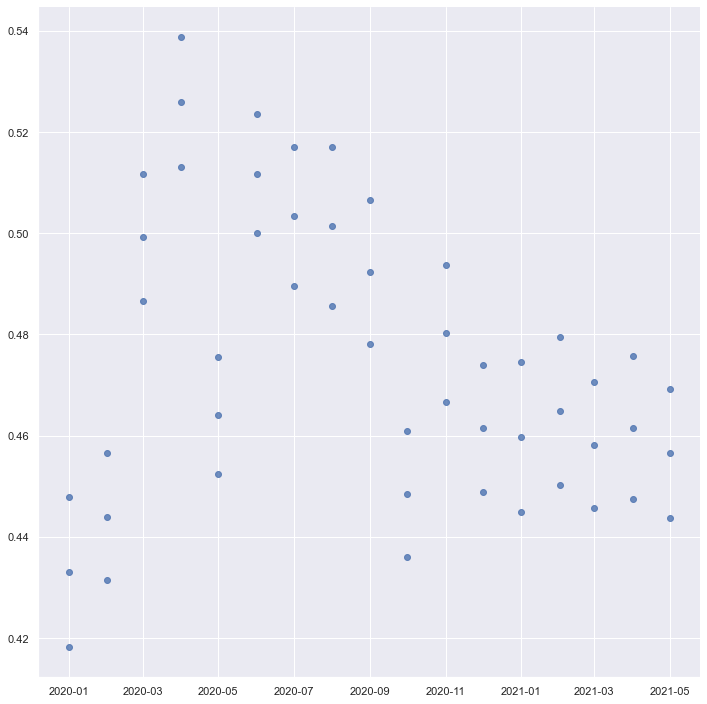

In [82]:

sns.set_theme(style="darkgrid")
sns.lmplot(
    x="date",
    y="slant",
    hue="site",
    data=df,
    ci=95,
    order=4,
    truncate=True,
    size=10
)
#plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.0)

In [76]:
labeled = pd.read_csv("data/output/newspaper_text_2020_ws_labeled.csv")
#labeled["fit"] = -1 * labeled["fit"] + 1

In [80]:
labeled

,link,category,date,page,title,text,author,tags,year,month,day,article,fit,se.fit
0,https://24.hu/belfold/2020/12/14/pulzoximeter-...,belfold,2020-12-14,24.hu,Így figyelheti a háziorvos folyamatosan az ott...,Kísérleti fázisba lépett egy olyan rendszer ki...,Benke Ágnes,"['pulzoximéter', 'koronavírus', 'véroxigénszin...",2020,12,14,text1,0.227403,0.028182
1,https://24.hu/belfold/2020/10/26/demeter-szila...,belfold,2020-10-26,24.hu,Demeter Szilárd fellép zenekarával a saját int...,A Petőfi Irodalmi Múzeum (PIM) és a Nemzeti Ku...,24.hu,"['pim', 'demeter szilárd', 'zenekar']",2020,10,26,text2,0.533404,0.000000
2,https://24.hu/belfold/2020/12/18/koronavirus-m...,belfold,2020-12-18,24.hu,Kínai vakcina is érkezhet még az idén hazánkba,Szijjártó Péter reálisnak tartja ezt a lehetős...,24.hu,"['koronavírus', 'magyarország', 'oltóanyag', '...",2020,12,18,text3,0.444394,0.000000
3,https://24.hu/belfold/2020/10/22/buntetofekeze...,belfold,2020-10-22,24.hu,"Úgy büntetőfékezett az audis, hogy megállt a k...",A bpiautosok.hu oldalára került fel az a fedél...,24.hu,"['büntetőfékezés', 'm1', 'm7', 'audi']",2020,10,22,text4,0.000000,NaN
4,https://24.hu/belfold/2020/10/27/vidnyanszky-a...,belfold,2020-10-27,24.hu,Hvg.hu: hétfőn Orbánnal egyeztetett Vidnyánszk...,"A hvg.hu úgy értesült, hogy a Nemzeti Kulturál...",24.hu,"['koronavírus', 'orbán viktor', 'vidnyánszky a...",2020,10,27,text5,0.918446,0.007979
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62519,https://telex.hu/belfold/2020/12/01/parlament-...,belfold,2020-12-01,telex,"Parlamenti nagyüzem: több pénz a kismamáknak, ...","Mostantól törvény garantálja, hogy július else...",Szalma Baksi Ferenc,NaN,2020,12,1,text62520,0.360940,0.038095
62520,https://telex.hu/belfold/2020/12/01/kamupartok...,belfold,2020-12-01,telex,A Fidesz 2022-ben is pályára engedi a kamupárt...,A kormány november 10-én éjjel 23:59-kor nyújt...,Fábián Tamás,NaN,2020,12,1,text62521,0.613801,0.117268
62521,https://telex.hu/belfold/2020/12/01/gulyas-ger...,belfold,2020-12-01,telex,Gulyás: A kormány december 9-én dönthet a kará...,Az Országgyűlés igazságügyi bizottsága kedden ...,Presinszky Judit,NaN,2020,12,1,text62522,0.668208,0.032599
62522,https://telex.hu/belfold/2020/12/01/magyar-koz...,belfold,2020-12-01,telex,Megint csak egy hajszálon múlt a tragédia az M...,Az elmúlt napokban két energiaelnyelő berendez...,Szalma Baksi Ferenc,NaN,2020,12,1,text62523,0.000000,NaN


In [79]:
labeled.groupby("page")["fit"].mean().sort_values()

page
origo    0.254746
24.hu    0.281773
Index    0.309641
888      0.350552
mno      0.351195
telex    0.384430
444      0.483930
Name: fit, dtype: float64

In [70]:
rated = pd.read_csv(
    "/Users/vigadam/Dropbox/github/media_network/media_data/qualtrics-news-headlines/rated_df.csv",
    index_col=0,
)

In [71]:
labeled = labeled.filter(["link", "fit", "se.fit"])

In [72]:
rated = rated.merge(labeled,on=["link"])

In [73]:
rated["page"].isnull().sum()

0

In [75]:
rated.to_csv("rating_ws_merge.csv")

In [65]:
rated

,link,date,page,rating,title,fit,se.fit
0,https://index.hu/belfold/2020/07/01/utoljara_k...,2020-07-01,index,3,Utoljára karácsonykor beszélt egymással Tarlós...,0.418983,0.121788
3,https://index.hu/belfold/2020/01/21/hasszan_f_...,2020-01-21,index,2,"Hasszán F. a szakértő szerint beszámítható, be...",0.903251,0.000000
6,https://index.hu/belfold/2020/11/12/toosz_szoc...,2020-11-12,index,2,Anyagi megbecsülést szorgalmaz a szociális dol...,0.663313,0.065753
8,https://index.hu/belfold/2020/09/02/lezarult_a...,2020-09-03,index,2,Lezárult a vizsgálat az Eszenyi-ügyben,0.000000,NaN
11,https://index.hu/belfold/2020/12/03/magyarorsz...,2020-12-03,index,3,Jövőre 120-150 ezerrel több ember minősülhet f...,0.457527,0.009286
...,...,...,...,...,...,...,...
12511,https://www.origo.hu/itthon/20200502-egy-orava...,2020-05-02,origo,3,"Egy órával később, szigorú biztonsági intézked...",0.253254,0.054722
12513,https://888.hu/ketharmad/kilenccel-nott-a-beaz...,2020-05-31,888,3,Kilenccel nőtt a beazonosított fertőzöttek szá...,0.131290,0.014274
12519,https://magyarnemzet.hu/belfold/noket-es-gyere...,2020-11-27,mno,2,Nőket és gyerekeket használt ki a pedofil csaló,0.627007,0.082280
12521,https://magyarnemzet.hu/belfold/nincs-fertozot...,2020-04-03,mno,1,Nincs fertőzött a börtönökben,0.345266,0.147471


In [62]:
rated = rated.drop_duplicates("link")

<Figure size 2880x3600 with 0 Axes>

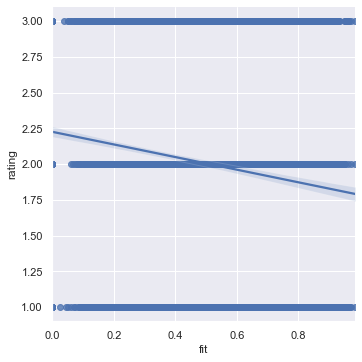

In [63]:
plt.figure(figsize=(40, 50))
sns.set_theme(style="darkgrid")
sns.lmplot(data=rated, x="fit", y="rating")

<Figure size 2880x3600 with 0 Axes>

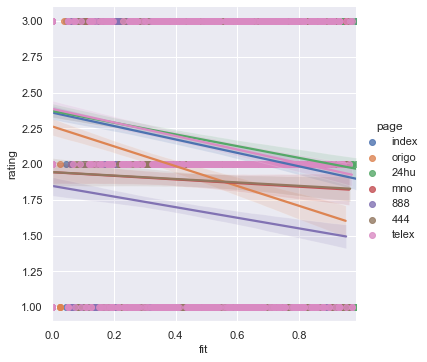

In [58]:
plt.figure(figsize=(40, 50))
sns.set_theme(style="darkgrid")
sns.lmplot(data=rated, x="fit", y="rating",hue="page")

In [33]:
rated[["rating","fit"]]

,rating,fit
rating,1.000000,-0.129968
fit,-0.129968,1.000000


<AxesSubplot:>

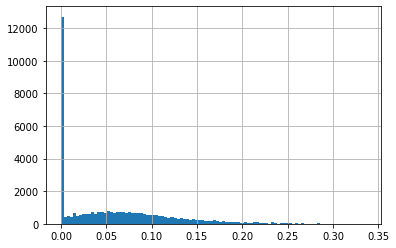

In [10]:
labeled["se.fit"].hist(bins=100)

In [5]:
labeled["neutral"] = labeled["fit"] == 0

In [7]:
labeled.groupby("page")["neutral"].count()

page
24.hu    12037
444       2034
888       5341
Index    11478
mno      13340
origo    16645
telex     1649
Name: neutral, dtype: int64

In [6]:
labeled.groupby("page")["neutral"].sum()

page
24.hu    5549
444       379
888       985
Index    4428
mno      2937
origo    7653
telex     503
Name: neutral, dtype: int64